In [ ]:
# import data 

In [2]:
# import packages

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel


In [159]:
# import data
data = pd.read_csv('US_Accidents_Dec19.csv')

# show the maximun text in dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

# define a function to Extracting Missing Count and Unique Count by Column
def miss_unique(dataframe):
    unique_count = []
    for x in dataframe.columns:
        unique_count.append([x,len(dataframe[x].unique()),dataframe[x].isnull().sum()])

    return pd.DataFrame(unique_count, columns=["Column","Unique","Missing"]).set_index("Column").T

miss_unique(data)

Column,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
Unique,2974335,3,22,4,2743101,2761499,1002359,985099,298606,302907,12847,1597507,37399,160715,3,11686,1713,49,377153,1,5,1996,470782,828,972,101,995,82,25,148,257,121,2,2,2,2,2,2,2,2,2,2,2,2,1,3,3,3,3
Missing,0,0,728071,0,0,0,0,0,2246264,2246264,0,1,1917605,0,0,83,0,0,880,0,3163,5691,36705,56063,1852623,59173,48142,65691,45101,440840,1998358,65932,0,0,0,0,0,0,0,0,0,0,0,0,0,93,93,93,93


In [160]:
# sort data by time and location, so we can fill the data by previous value in this case

In [161]:
data['Start_Time'] = pd.to_datetime(data['Start_Time'])

In [162]:
data = data.sort_values(['Start_Time', 'Start_Lat','Start_Lng'])

In [163]:
data.head(200)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
2771425,A-2771449,Bing,NaN,4,2015-03-09 07:00:00,2018-07-31 19:00:00,41.678690,-83.573370,41.677724,-83.573758,0.070,Closed at I-475/Exit 204 - Road closed due to accident. Roadwork.,NaN,I-75 S,R,Toledo,Lucas,OH,43610,US,US/Eastern,KDUH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN
2392053,A-2392077,Bing,NaN,4,2016-01-14 20:18:33,2017-01-30 13:25:19,40.630609,-75.470606,40.630292,-75.471697,0.061,Closed at Fullerton Ave - Road closed due to accident. Roadwork. Lane blocked.,NaN,US-22 E,R,Whitehall,Lehigh,PA,18052,US,US/Eastern,KABE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2392063,A-2392087,Bing,NaN,4,2016-01-14 20:18:33,2017-01-30 13:34:02,40.630609,-75.470606,40.630292,-75.471697,0.061,Closed at Fullerton Ave - Road closed due to accident. Roadwork. Lane blocked.,NaN,US-22 E,R,Whitehall,Lehigh,PA,18052,US,US/Eastern,KABE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2392076,A-2392100,Bing,NaN,4,2016-01-14 20:18:33,2017-01-30 13:55:44,40.630609,-75.470606,40.630292,-75.471697,0.061,Closed at Fullerton Ave - Road closed due to accident. Roadwork. Open.,NaN,US-22 E,R,Whitehall,Lehigh,PA,18052,US,US/Eastern,KABE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2405576,A-2405600,Bing,NaN,4,2016-01-14 20:18:33,2017-02-17 23:22:00,40.630609,-75.470606,40.630292,-75.471697,0.061,Closed at Fullerton Ave - Road closed due to accident. Roadwork. Lane blocked.,NaN,US-22 E,R,Whitehall,Lehigh,PA,18052,US,US/Eastern,KABE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2405729,A-2405753,Bing,NaN,4,2016-01-14 20:18:33,2017-02-19 00:38:00,40.630609,-75.470606,40.630292,-75.471697,0.061,Closed at Fullerton Ave - Road closed due to accident. Roadwork. Traffic problem.,NaN,US-22 E,R,Whitehall,Lehigh,PA,18052,US,US/Eastern,KABE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2414519,A-2414543,Bing,NaN,4,2016-01-14 20:18:33,2017-03-17 22:49:03,40.630609,-75.470606,40.630292,-75.471697,0.061,Closed at Fullerton Ave - Road closed due to accident. Roadwork. Lane blocked.,NaN,US-22 E,R,Whitehall,Lehigh,PA,18052,US,US/Eastern,KABE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2417802,A-2417826,Bing,NaN,4,2016-01-14 20:18:33,2017-03-29 12:26:40,40.630609,-75.470606,40.630292,-75.471697,0.061,Closed at Fullerton Ave - Road closed due to accident. Roadwork. Traffic problem.,NaN,US-22 E,R,Whitehall,Lehigh,PA,18052,US,US/Eastern,KABE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2246264,A-2246288,Bing,NaN,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentangy Riv Rd/Exit 22 - Accident.,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,

In [164]:
### fill the data by the previous value
data.fillna(method = 'ffill', inplace = True)

In [165]:
data.isnull().sum()

ID                       0 
Source                   0 
TMC                      9 
Severity                 0 
Start_Time               0 
End_Time                 0 
Start_Lat                0 
Start_Lng                0 
End_Lat                  0 
End_Lng                  0 
Distance(mi)             0 
Description              0 
Number                   11
Street                   0 
Side                     0 
City                     0 
County                   0 
State                    0 
Zipcode                  0 
Country                  0 
Timezone                 0 
Airport_Code             0 
Weather_Timestamp        8 
Temperature(F)           8 
Wind_Chill(F)            8 
Humidity(%)              8 
Pressure(in)             8 
Visibility(mi)           8 
Wind_Direction           8 
Wind_Speed(mph)          8 
Precipitation(in)        8 
Weather_Condition        8 
Amenity                  0 
Bump                     0 
Crossing                 0 
Give_Way            

In [166]:
data.fillna(method = 'bfill', inplace = True)

In [167]:
data.isnull().sum()

ID                       0
Source                   0
TMC                      0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
End_Lat                  0
End_Lng                  0
Distance(mi)             0
Description              0
Number                   0
Street                   0
Side                     0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
N

In [168]:
sample_data = data.sample(frac = 0.05, random_state = 1)

In [169]:
sample_data.shape

(148717, 49)

In [37]:
sample_data.to_csv(r'sample_data.csv')

In [1]:
# import data
data = pd.read_csv('sample_data.csv')
data.head()

NameError: name 'pd' is not defined

In [171]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
def miss_unique(dataframe):
    unique_count = []
    for x in dataframe.columns:
        unique_count.append([x,len(dataframe[x].unique()),dataframe[x].isnull().sum()])

    return pd.DataFrame(unique_count, columns=["Column","Unique","Missing"]).set_index("Column").T

miss_unique(data)

Column,Unnamed: 0,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
Unique,148717,148717,3,21,4,138164,138686,111866,111332,78554,78859,4596,127697,19282,34676,2,6349,1257,49,44673,1,4,1619,94509,679,797,99,812,56,24,77,186,76,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2
Missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### data cleaning & preprocessing

In [172]:
############# data clearning ###################
#### end_time - start_time (Zejian)
#### delete_useless: TMC, source, lat, lng, number, street, zipcode, city, country, timezone, weather_timestamp, wind_chill, precipitation, wind_direction, turning_loop, pressure (Zejian)
#### temperature -> categorzied (Jade)
#### Sunrise_Sunset	Civil_Twilight	Nautical_Twilight	Astronomical_Twilight -> if three of then are day, then day, otherwise night (Zejian)
#### distance -> 0 or other (Zejian)
#### humidity -> categorized (Jade)
#### visibility -> categorized (Jade)
#### wind_speed -> round (Zejian)
#### weather_condition -> categorized (Jade)

In [173]:
### 1. delete useless data
data = data.drop(['Unnamed: 0','TMC', 'Source','Start_Lat', 'Start_Lng', 'End_Lng','End_Lat','Number','Timezone','Street',
                  'Zipcode', 'Country' ,'City','State', 'Weather_Timestamp','Wind_Chill(F)', 'Precipitation(in)', 
                  'Wind_Direction', 'Turning_Loop', 'Pressure(in)','Airport_Code'], axis=1)

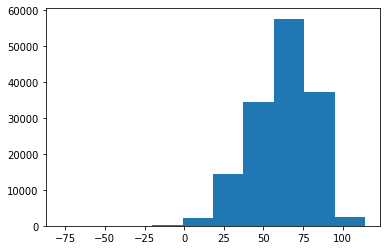

In [174]:
### 2. temporature
# check the distribution of temperature
plt.hist(data['Temperature(F)'])
plt.show()

In [175]:
def tempset(data):
        # if temp < 0 -> 0, if 0 < temp < 32 -> 1, 33 < tmp < 60 -> 2, 60 < tmp < 80 -> 3, 80 < temp < 100 -> 4, temp > 100 -> 5
        if data['Temperature(F)'] <= 0: 
            return 0
        elif data['Temperature(F)'] > 0 and data['Temperature(F)'] <= 32: 
            return 1
        elif data['Temperature(F)']> 33 and data['Temperature(F)'] <= 60: 
            return 2
        elif data['Temperature(F)'] > 60 and data['Temperature(F)'] <= 90: 
            return 3
        else:
            return 4
data['Temperature(scale)'] = data.apply(lambda x: tempset(x), axis = 1)


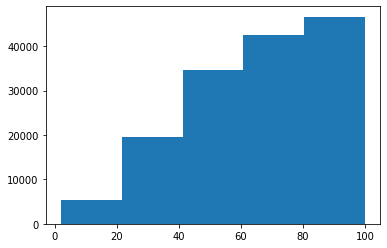

In [176]:
### 3. humidity
# check the distribution of humidity
plt.hist(data['Humidity(%)'], bins = 5)
plt.show()

In [177]:
def humset(data):
        # if humidity < 20 -> 0, if 20 < humidity < 40 -> 1, 40 < humidity < 60 -> 2, 60 < humidity < 80 -> 3, 80 < humidity -> 4 
        if data['Humidity(%)'] < 20: 
            return 0
        elif data['Humidity(%)'] > 20 and data['Humidity(%)'] <= 40: 
            return 1
        elif data['Humidity(%)']> 40 and data['Humidity(%)'] <= 60: 
            return 2
        elif data['Humidity(%)'] > 60 and data['Humidity(%)'] <= 80: 
            return 3
        else:
            return 4
data['Humidity(scale)'] = data.apply(lambda x: humset(x), axis = 1)


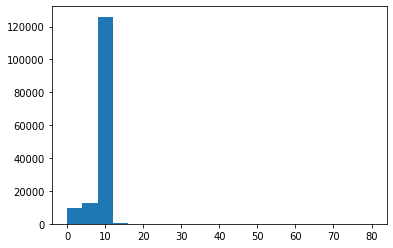

In [178]:
### 4. visibility
# check the distribution of visibility
plt.hist(data['Visibility(mi)'], bins = 20)
plt.show()

In [179]:
def visualset(data):
        # if visibility < 10 -> 0, else 1 
        if data['Visibility(mi)'] < 10: 
            return 0
        else: 
            return 1

data['Visibility(scale)'] = data.apply(lambda x: visualset(x), axis = 1)


In [180]:
### 4. visibility
# check the distribution of temperature
pd.set_option('display.max_row', 1000)
data['Weather_Condition'].unique()

array(['Clear', 'Light Rain', 'Cloudy', 'Fair', 'Mostly Cloudy',
       'Scattered Clouds', 'Partly Cloudy', 'Overcast', 'Light Snow',
       'Haze', 'Heavy Rain', 'Heavy Snow', 'Snow', 'Light Drizzle',
       'Rain', 'Fog', 'Light Freezing Fog', 'Thunderstorm',
       'Light Rain / Windy', 'Patches of Fog', 'Thunderstorms and Rain',
       'Light Freezing Rain', 'Haze / Windy', 'Mist',
       'Wintry Mix / Windy', 'Wintry Mix', 'T-Storm', 'Drizzle',
       'Partly Cloudy / Windy', 'Light Thunderstorms and Rain', 'Smoke',
       'Light Rain with Thunder', 'Rain / Windy',
       'Thunder in the Vicinity', 'Mostly Cloudy / Windy',
       'Heavy T-Storm / Windy', 'Fair / Windy',
       'Heavy Thunderstorms and Rain', 'Light Freezing Drizzle',
       'Shallow Fog', 'Light Rain Showers', 'Thunder', 'Cloudy / Windy',
       'Fog / Windy', 'Light Snow / Windy', 'Heavy Drizzle',
       'Light Rain Shower', 'Heavy T-Storm', 'Light Ice Pellets',
       'Blowing Dust / Windy', 'Heavy Rain / Windy

In [181]:
#### 5. weather type
# categorize weathers to three types: 0. extrem 1.clear 2. other
def weatherset(data):
        if 'Heavy' in data['Weather_Condition'] or 'storm' in data['Weather_Condition']or 'Storm' in data['Weather_Condition'] or 'Squalls' in data['Weather_Condition'] or 'Dust' in data['Weather_Condition']: 
            return 0
        elif 'Clear' in data['Weather_Condition'] or 'Fair' in data['Weather_Condition']:
            return 1
        else:
            return 2
data['Weather(scale)'] = data.apply(lambda x: weatherset(x), axis = 1)


(array([ 1631., 58520., 88566.]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <a list of 3 Patch objects>)

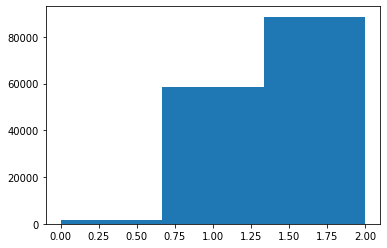

In [182]:
plt.hist(data['Weather(scale)'], bins = 3)


In [186]:
#### 6. duration
def duration(data):
        diff = data['End_Time']- data['Start_Time']
        # convert the time differences to minutes 
        minutes = diff.total_seconds() / 60
        return minutes
data['Duration'] = data.apply(lambda x: duration(x), axis = 1)

In [188]:
#### 7. wind speed (round)
data['Wind_Speed(mph)']=data['Wind_Speed(mph)'].astype('int')

In [189]:
#### 8. distance
# if >0 -> 1, <= 0 ->0
row_indexes=data[data['Distance(mi)']>0].index
data.loc[row_indexes,'Influence']=1
row_indexes=data[data['Distance(mi)']<=0].index
data.loc[row_indexes,'Influence']=0

In [191]:
#### 9. count 

# if more than two of the measurements are day -> day
# otherwise -> night

# count how many days there are in one row
def countt (data):
    a = 0
    b = 0
    c = 0
    d = 0
    sum = 0
    if data['Sunrise_Sunset'] == 'Day':
        a = a+1
    if data['Civil_Twilight'] == 'Day':
        b = b+1
    if data['Nautical_Twilight'] == 'Day':
        c = c+1
    if data['Astronomical_Twilight'] == 'Day':
        d = d+1
        
    sum = a+b+c+d
    return sum

def daynight(data):
    sum = countt(data)
    if sum >=3:
        return 1
    else:
        return 0

data['Day_Night'] = data.apply(lambda x: daynight(x), axis = 1)


### text mining

In [ ]:
#### 10.discription

In [85]:
from nltk.corpus import wordnet
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shuyu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Shuyu\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [86]:
# define the word's tag
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
# clean the text
def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove specific stop words
    specific_stop_words = ['ave','rd','st','accident','route','state','due']
    text = [z for z in text if z not in specific_stop_words]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    
    # join all
    text = " ".join(text)
    return(text)

In [87]:
# generate the clean version of the description
data["Description_Clean"] = data["Description"].apply(lambda x: clean_text(x))

(-0.5, 1439.5, 1079.5, -0.5)

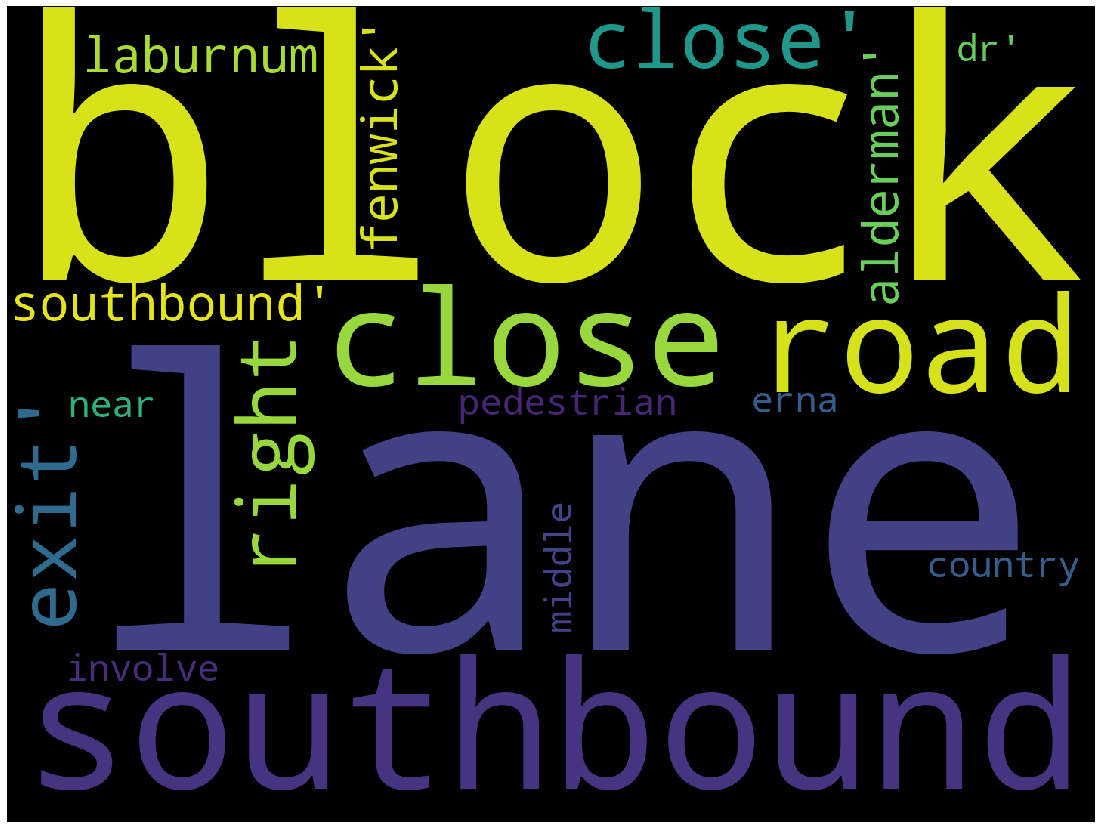

In [90]:
# Plot the word cloud
from wordcloud import WordCloud
cloud = WordCloud(width=1440, height=1080).generate(str(data.Description_Clean.astype(str).values))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

In [91]:
# generate the vectors of the clean words
ngram_vect = TfidfVectorizer(ngram_range = (1,2))
data['tf_idf'] = ngram_vect.fit_transform(data["Description_Clean"])

In [95]:
ngram_vect.get_feature_names()

110150

In [ ]:
data_clean

In [196]:
# drop the original data
data_clean = data.drop(['Start_Time','End_Time','Temperature(F)','Humidity(%)',
                 'Visibility(mi)','Wind_Speed(mph)','Weather_Condition',
                 'Distance(mi)','Sunrise_Sunset',
                 'Civil_Twilight','Nautical_Twilight','Astronomical_Twilight',
                 'Description'], axis=1)

In [102]:
data_clean = data_clean.drop(['tf_idf'], axis = 1)

In [197]:
data_clean.to_csv('cleaned_data.csv')

In [10]:
# import the cleaned data
data_clean = pd.read_csv('cleaned_data.csv')

In [11]:
data_clean.head()

,Unnamed: 0,ID,Severity,Side,County,Amenity,Bump,Crossing,Give_Way,Junction,...,Stop,Traffic_Calming,Traffic_Signal,Temperature(scale),Humidity(scale),Visibility(scale),Weather(scale),Duration,Influence,Day_Night
0,0,A-2301378,4,R,Columbia,False,False,False,False,False,...,False,False,False,2,4,0,1,360.0,1.0,0
1,1,A-917817,3,R,Carbon,False,False,False,False,False,...,False,False,False,2,4,0,2,61.0,0.0,1
2,2,A-922980,3,R,Los Angeles,False,False,False,False,False,...,False,False,False,3,3,1,2,44.0,0.0,0
3,3,A-2101333,2,R,Oklahoma,False,False,True,False,False,...,False,False,True,2,2,1,1,29.0,0.0,0
4,4,A-2506454,2,L,Los Angeles,False,False,False,False,False,...,False,False,False,2,4,1,1,102.0,0.0,0


In [12]:
data_clean = data_clean.drop(['County','Unnamed: 0'], axis = 1)

In [13]:
# make all of the data categorical variables
le = LabelEncoder()
data_encoded = data_clean.apply(le.fit_transform)

In [14]:
data_encoded

,ID,Severity,Side,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,...,Stop,Traffic_Calming,Traffic_Signal,Temperature(scale),Humidity(scale),Visibility(scale),Weather(scale),Duration,Influence,Day_Night
0,72362,3,1,0,0,0,0,0,0,0,...,0,0,0,2,4,0,1,336,1,0
1,144169,2,1,0,0,0,0,0,0,0,...,0,0,0,2,4,0,2,49,0,1
2,144442,2,1,0,0,0,0,0,0,0,...,0,0,0,3,3,1,2,32,0,0
3,61325,1,1,0,0,1,0,0,0,0,...,0,0,1,2,2,1,1,17,0,0
4,83755,1,0,0,0,0,0,0,0,0,...,0,0,0,2,4,1,1,90,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148712,80693,1,1,0,0,1,0,0,0,0,...,0,0,1,3,1,1,1,336,1,1
148713,16974,1,1,0,0,0,0,0,0,0,...,0,0,1,3,3,1,2,17,1,1
148714,124469,1,1,0,0,0,0,0,0,0,...,0,0,1,3,4,1,2,93,0,1
148715,11797,1,1,0,0,0,0,0,0,0,...,0,0,0,3,1,1,2,48,0,1


In [15]:
data_encoded.dtypes

ID                    int32
Severity              int64
Side                  int32
Amenity               int64
Bump                  int64
Crossing              int64
Give_Way              int64
Junction              int64
No_Exit               int64
Railway               int64
Roundabout            int64
Station               int64
Stop                  int64
Traffic_Calming       int64
Traffic_Signal        int64
Temperature(scale)    int64
Humidity(scale)       int64
Visibility(scale)     int64
Weather(scale)        int64
Duration              int64
Influence             int64
Day_Night             int64
dtype: object

In [16]:
# make dummy variables
data_dummy = pd.get_dummies(data_encoded, columns = ['Temperature(scale)',
                                                    'Humidity(scale)',
                                                    'Weather(scale)'])

In [17]:
# seperate the training and test set
y = data_dummy['Severity']
X = data_dummy.copy()

In [18]:
X = X.drop('Severity', axis = 1)
X = X.drop('ID', axis = 1)
X.head()

,Side,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,...,Temperature(scale)_3,Temperature(scale)_4,Humidity(scale)_0,Humidity(scale)_1,Humidity(scale)_2,Humidity(scale)_3,Humidity(scale)_4,Weather(scale)_0,Weather(scale)_1,Weather(scale)_2
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [19]:
# normalize the data 
from sklearn import preprocessing
X = preprocessing.normalize(X)

### decision tree/knn/logistic regression w normalization & dummy variables

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                        test_size=0.3, random_state=42)
dt_basic = DecisionTreeClassifier()
dt_basic.fit(X_train, y_train)
y_predict = dt_basic.predict(X_test)
print('DT:',accuracy_score(y_test, y_predict))

DT: 0.6704769589384973


In [234]:
rf_basic = RandomForestClassifier()
rf_basic.fit(X_train, y_train)
rf_predict = rf_basic.predict(X_test)
print('RF:',accuracy_score(y_test, y_predict))

RF: 0.6911870181100951


In [226]:
knn_basic = KNeighborsClassifier()
knn_basic.fit(X_train, y_train)
y_predict = knn_basic.predict(X_test)
print('KNN:',accuracy_score(y_test, y_predict))

KNN: 0.6628787878787878


In [39]:
from sklearn.linear_model import LogisticRegression
lr_basic = LogisticRegression()
lr_basic.fit(X_train, y_train)
y_predict = lr_basic.predict(X_test)
print('logistic regression:',accuracy_score(y_test, y_predict))

logistic regression: 0.6711717769410077


C:\Users\Shuyu\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [229]:
xgb_basic = XGBClassifier()
xgb_basic.fit(X_train, y_train)
y_predict = xgb_basic.predict(X_test)
print('xgb: ',accuracy_score(y_test, y_predict))

xgb:  0.6888111888111889


In [232]:
lgbm_basic = LGBMClassifier()
lgbm_basic.fit(X_train, y_train)
y_predict = lgbm_basic.predict(X_test)
print('lgbm: ',accuracy_score(y_test, y_predict))

lgbm:  0.6911870181100951


### feature selection

In [251]:
for feature in zip(d.columns, rf_basic.feature_importances_):
    print(feature)

('Side', 0.18935680451456294)
('Amenity', 0.006247652238635374)
('Bump', 1.805364583189637e-05)
('Crossing', 0.03208449556286639)
('Give_Way', 0.0026331603189508994)
('Junction', 0.02687630465322104)
('No_Exit', 0.0009361215536218413)
('Railway', 0.004358415048277432)
('Roundabout', 4.3016732755959116e-05)
('Station', 0.008581427869890605)
('Stop', 0.011438540543588203)
('Traffic_Calming', 0.000351152860183727)
('Traffic_Signal', 0.09747410907291541)
('Visibility(scale)', 0.055980425641173455)
('Duration', 0.0801812482551157)
('Influence', 0.05364081474226922)
('Day_Night', 0.05730788923031072)
('Temperature(scale)_0', 0.002769782798830311)
('Temperature(scale)_1', 0.022297171725002486)
('Temperature(scale)_2', 0.039347350487468846)
('Temperature(scale)_3', 0.04752287901950851)
('Temperature(scale)_4', 0.013053979870462716)
('Humidity(scale)_0', 0.011893766522692592)
('Humidity(scale)_1', 0.026200756695482295)
('Humidity(scale)_2', 0.033522194066190815)
('Humidity(scale)_3', 0.03859565

### Grid search & PCA


In [302]:
from sklearn import decomposition
from sklearn import pipeline
from sklearn.model_selection import GridSearchCV

lgbm = LGBMClassifier()

# Create a pca object
pca = decomposition.PCA()

# tranform the data with PCA.
# Third, train a Decision Tree Classifier on the data.
pipe = pipeline.Pipeline(steps=[('pca', pca),
                           ('lgbm', lgbm)])

    
# Create lists of parameter for lgbmclassifier

    
params = {'lgbm__num_leaves': [60,70,80],
         'lgbm__max_depth': [4,8,12,16]}

lgbm_pca = GridSearchCV(estimator=pipe , param_grid=params, cv = 5)

In [303]:
lgbm_pca.fit(X_train, y_train)

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [305]:
print('Best num_leaves:', lgbm_pca.best_estimator_.get_params()['lgbm__num_leaves'])
print('Best max_depth:', lgbm_pca.best_estimator_.get_params()['lgbm__max_depth'])

print(lgbm_pca.best_estimator_.get_params()['lgbm'])

Best num_leaves: 60
Best max_depth: 12
LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=12,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=60, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [306]:
y_predict = lgbm_pca.predict(X_test)
accuracy_score(y_test, y_predict)

0.6859198493813878

### resampling inbalanced dataset


In [21]:
count_class_1, count_class_2, count_class_3, count_class_0 = data_dummy.Severity.value_counts()

In [22]:
data_dummy.Severity.value_counts()

1    99611
2    44498
3     4570
0       38
Name: Severity, dtype: int64

In [23]:
df_class_1 = data_dummy[data_dummy['Severity'] == 1]
df_class_2 = data_dummy[data_dummy['Severity'] == 2]
df_class_3 = data_dummy[data_dummy['Severity'] == 3]

In [24]:
df_class_1 = df_class_1.sample(count_class_3)
df_class_2 = df_class_2.sample(count_class_3)

In [25]:
df = pd.concat([df_class_1, df_class_2], axis=0)
df = pd.concat([df, df_class_3], axis=0)


In [26]:
df.Severity.value_counts()

3    4570
2    4570
1    4570
Name: Severity, dtype: int64

In [27]:
df

,ID,Severity,Side,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,...,Temperature(scale)_3,Temperature(scale)_4,Humidity(scale)_0,Humidity(scale)_1,Humidity(scale)_2,Humidity(scale)_3,Humidity(scale)_4,Weather(scale)_0,Weather(scale)_1,Weather(scale)_2
140001,43653,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
104515,89549,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
3343,91345,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
139923,122266,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
25800,50387,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148617,96418,3,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
148646,91915,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
148671,99157,3,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
148686,96846,3,1,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0


In [28]:
# seperate the training and test set
y_b = df['Severity']
X_b = df.copy()
X_b = X_b.drop('Severity', axis = 1)
X_b = X_b.drop('ID', axis = 1)
from sklearn import preprocessing
X_b = preprocessing.normalize(X_b)

In [29]:
### decision tree/knn/logistic regression w normalization & dummy variables

In [30]:
Xb_train, Xb_test, yb_train, yb_test = train_test_split(X_b, y_b, 
                                        test_size=0.3, random_state=42)
dt_basic = DecisionTreeClassifier()
dt_basic.fit(Xb_train, yb_train)
yb_predict = dt_basic.predict(Xb_test)
print('DT:',accuracy_score(yb_test, yb_predict))

DT: 0.6194991490396304


In [35]:
dt_basic = RandomForestClassifier()
dt_basic.fit(Xb_train, yb_train)
yb_predict = dt_basic.predict(Xb_test)
print('rf:',accuracy_score(yb_test, yb_predict))


      

rf: 0.6445416970581085


In [44]:
dt_basic = LGBMClassifier()
dt_basic.fit(Xb_train, yb_train)
yb_predict = dt_basic.predict(Xb_test)
print('knn:',accuracy_score(yb_test, yb_predict))

knn: 0.6683685874057865


## clustering

In [392]:
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

C:\Users\Shuyu\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


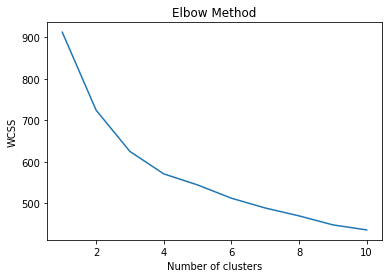

In [393]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

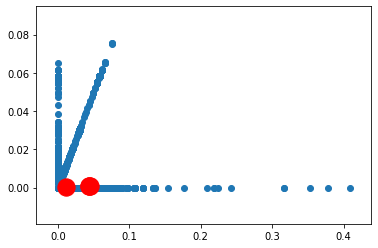

In [394]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()